### Lab 2 Assignment
- Deadline:
- total points: 70 + 10 bonus

### <font color ='red'> Luming's comment:
- total time spent: 110 - 150 mins
- other comments please see below (in red) and ctrl+F search "COMMENT"

In this assignment, we will be working on the Beijing PM2.5 dataset and investiage whether the air quality is improved or not in recent years as a series of policies has been implemented to restrict emissions and faciliate the sustainable urban development. The original PM2.5 concentration dataset was collected from Beijing Municipal Ecological and Environmental Monitoring Center (http://www.bjmemc.com.cn/), and was aggregated from hourly level to daily level PM2.5 concentration. 

Now open the data folder, there are five PM2.5 Excel files corresponding to five years, ranging from 2014 to 2018. Randomly open a file and check out the column names. The first column stores the date in the format of "YYYYMMDD", and the remaining columns are the names of 35 air quality monitoring stations that collect the daily PM2.5 concentration ($\mu{}g/m^3$).

Now finish the following tasks based on the requirements:

(1) (10 pts) combine the five PM2.5 datasets and store them in a single dataframe. Make sure the column names for each year are the same before combining the files and no redundant rows exist in the final dataframe. Note that after you generating a combined dataframe, run the following code to converts each columns to intgeral or float types.
```python
df_combine = df_combine.apply(pd.to_numeric)
```

(2) (10 pts) 
   - Create a new column named "PM25_Average" that saves the daily average PM2.5 concentration in the 35 monitoring stations. You can use the `pd.mean(axis = 1)` to add up the each columns.   
   - If a day with good air quality can be defined as the daily average PM2.5 concentration samller than 75 ($\mu{}g/m^3$), then what percentage of days has a good air quality? 
 
(3) (10 pts) Create a new variable (column) called "Year" to store the corresponding years (YYYY only, instead of YYYYMMDD). Place the new column between the column "date" and "Dongsi".    

(4) (10 pts) If a day with daily average PM2.5 concentration greater than 200 ($\mu{}g/m^3$) can be regarded as a seriously polluted day, then for the monitoring station "Olympic Center" and "The Great Wall", how many days are counted as the seriously polluted day for each year? how many days are counted as good air quality day each year? Do you observe any improvement in air quality? You can use the function `.groupby().count()` to count the number of days. 

(5) (10 pts) Generate a line plot that displays the daily PM2.5 change in 2014 for the monitoring station "Olympic Center" which locates in the inner city area, and the station called "The Great Wall" in the mountainous area. What do you find? Please plot the two lines in the same Axes for easier comparison, and also make sure the x-axis is "date", and the y-axis are the PM2.5 values. Hint: you can convert each element in the column "date" to string using `df["date"].astype("string")`
<font color='red'> astype("string") does not work in my python, I use `atype(str)` </font>

(6) (10 pts) Generate a line plot that displays the trend of PM2.5 from 2014 to 2018 for the stations "Olympic Center" and "The Great Wall". Please plot the two lines in the same Axes for easier comparison.  <font color="red"> better to add "using annual average data" </font>


(7) (10 pts) Now Let us create a spatial dataset by adding the longitude and latitude to each station. The combined dataset now has station names as columns and a sequence as index. To join the coordinates to the dataset, we need to make the station names in the rows and date in the column names. The easiest solution is simply using `df = df.T` that transposes the index and columns. But before that, make sure to import the `numpy` package (`import numpy as np`) to enable its built-in function `.T`. Also, set "date" column as index. Next, find the excel called "lnglat.xlsx" which stores the longitude and latitude of the stations. Merge it to the transposed dataframe.  


(8) (10 bonus points) Convert the dataset from the wide format for cross-sectional analysis to the long format that is ready for panel regression.  

In [5]:
#Luming's Answer:
import pandas as pd

#(1)
import os
os.getcwd()

df_combine = pd.DataFrame()

for year in list(range(2014, 2019)): 
    
    # construct the relative file path
    df_temp = pd.read_excel("PM25_dataset/PM25_" + str(year) + ".xlsx")
    if year == 2014:
        col_2014 = df_temp.columns
        df_combine = df_temp # assign df_2014 to df_combine in the first round of loop.
        
    else:     
        df_temp.columns = col_2014
        df_combine = pd.concat([df_combine, df_temp[2:]])

df_combine.reset_index(drop = True, inplace = True) 
df_combine = df_combine.apply(pd.to_numeric)
df_combine.to_excel("PM25_dataset/PM25_combine.xlsx")
df_combine

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Miyun Reservior,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,25.666667,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,66.000000,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,25.842105,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,82.916667,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,85.823529,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,4.333333,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,5.833333,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.041667,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,8.375000,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000


In [6]:
#(2)
df_combine['PM25_Average'] = df_combine.iloc[:,1:].mean(axis = 1)
df_combine

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [7]:
a=len(df_combine[df_combine['PM25_Average'] <=75])
b=len(df_combine['PM25_Average'])
goodrate=a/b
print(a,'/',b,'=',goodrate)

1181 / 1798 = 0.6568409343715239


In [8]:
#(3)
#convert date back to string
df_combine['date'].astype(str)
#slice year from string
df_combine['Year']= df_combine['date'].astype(str).str[:4]

#move
c = df_combine['Year']
df_combine.drop(labels=['Year'], axis=1, inplace = True)
df_combine.insert(1, 'Year', c)
df_combine

,date,Year,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,2014,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,2014,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,2014,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,2014,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,2014,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,2018,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,2018,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,2018,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,2018,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [9]:
#(4)
df_oc_b = df_combine[df_combine['Olympic Center']>=200]
df_oc_g = df_combine[df_combine['Olympic Center']<=75]
oc_b = df_oc_b.groupby('Year')['Olympic Center'].count()
oc_g = df_oc_g.groupby('Year')['Olympic Center'].count()

df_gw_b = df_combine[df_combine['The Great Wall']>=200]
df_gw_g = df_combine[df_combine['The Great Wall']<=75]
gw_b = df_gw_b.groupby('Year')['The Great Wall'].count()
gw_g = df_gw_g.groupby('Year')['The Great Wall'].count()

print("Olympic Center" ,'\n','Bad Days', '\n', oc_b, '\n', 'Good Days','\n', oc_g)
print("The Great Wall" ,'\n','Bad Days', '\n', gw_b, '\n', 'Good Days','\n', gw_g)

print("The number of seriously polluted days was decreasing in both stations and the number of good air quality days was increasing.")

Olympic Center 
 Bad Days 
 Year
2014    31
2015    28
2016    20
2017    10
2018     5
Name: Olympic Center, dtype: int64 
 Good Days 
 Year
2014    178
2015    216
2016    231
2017    264
2018    287
Name: Olympic Center, dtype: int64
The Great Wall 
 Bad Days 
 Year
2014    19
2015     2
2016     3
2017     4
2018     4
Name: The Great Wall, dtype: int64 
 Good Days 
 Year
2014    236
2015    269
2016    212
2017    285
2018    303
Name: The Great Wall, dtype: int64
The number of seriously polluted days was decreasing in both stations and the number of good air quality days was increasing.


## 65 min!

Olympic Center has a higher PM2.5 concentration than the Great Wall station.


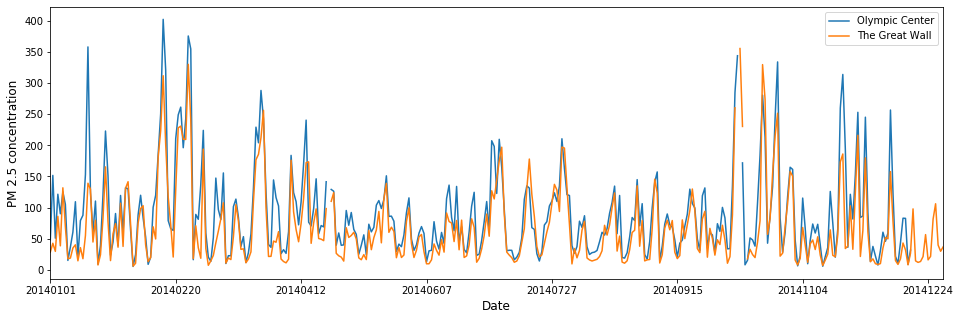

In [49]:
#(5)
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# slice the unitprice in 2014 using df.loc[]
df_2014 = df_combine.loc[df_combine["Year"] == '2014', ["Olympic Center",'The Great Wall','date']]
df_2014['date'] = df_2014["date"].astype(str)
fig, ax = plt.subplots(figsize=(16, 5))


df_2014.plot(kind = "line", x='date', y="Olympic Center", ax = ax, label = "Olympic Center")
df_2014.plot(kind = "line", x='date', y='The Great Wall', ax = ax, label = "The Great Wall")

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("PM 2.5 concentration", fontsize=12)

ax.legend()
fig.savefig("airquality.png")
print("Olympic Center has a higher PM2.5 concentration than the Great Wall station.")

### 80 min

Olympic Center has a higher PM2.5 concentration than the Great Wall station.


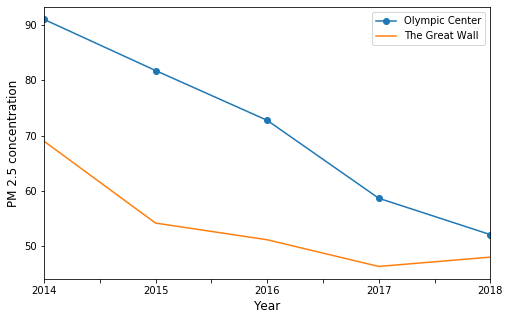

In [53]:
#(6)
df_sub = df_combine[['Olympic Center','The Great Wall','Year']]

oc_ave = df_sub.groupby('Year')['Olympic Center'].mean()
gw_ave = df_sub.groupby('Year')['The Great Wall'].mean()

fig, ax = plt.subplots(figsize=(8, 5))


oc_ave.plot(kind = "line", x='Year', y="Olympic Center", marker = 'o', ax = ax, label = "Olympic Center")
gw_ave.plot(kind = "line", x='Year', y='The Great Wall', ax = ax, label = "The Great Wall")

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("PM 2.5 concentration", fontsize=12)

ax.legend()
fig.savefig("annualaverage.png")
print("Olympic Center has a higher PM2.5 concentration than the Great Wall station. PM 2.5 concentrations were declining from 2014 to 2018.")

(7) (10 pts) Now Let us create a spatial dataset by adding the longitude and latitude to each station. The combined dataset now has station names as columns and a sequence as index. To join the coordinates to the dataset, we need to make the station names in the rows and date in the column names. The easiest solution is simply using `df = df.T` that transposes the index and columns. But before that, make sure to import the `numpy` package (`import numpy as np`) to enable its built-in function `.T`. Also, set "date" column as index. Next, find the excel called "lnglat.xlsx" which stores the longitude and latitude of the stations. Merge it to the transposed dataframe.  


(8) (10 bonus points) Convert the dataset from the wide format for cross-sectional analysis to the long format that is ready for panel regression.  


In [70]:
#(7)
import numpy as np
df_combine = df_combine.set_index('date')
df_combineT = df_combine.T

KeyError: "None of ['date'] are in the columns"

In [72]:
df_combineT.drop(index='Year',inplace=True)
df_combineT.head()

date,20140101,20140102,20140103,20140104,20140105,20140106,20140107,20140108,20140109,20140110,...,20181222,20181223,20181224,20181225,20181226,20181227,20181228,20181229,20181230,20181231
Dongsi,56.2083,129.375,50.5833,130.458,90.8333,133.792,103,17.5,25.4348,67.625,...,41.9167,10.5417,56.9583,34.8261,18.7917,8.83333,8.54167,8.33333,12.625,39.125
Tiantan,48.75,108.625,44.8333,125.542,78.4583,133.75,91.5417,13.4583,24.4348,67.7917,...,49.9167,9.35,61.7826,35.1304,3.18182,7.11111,6.79167,8.52174,11.9167,38.2083
Guanyuan,48.7917,113.458,43.6667,115.583,74.2917,121.5,95.125,13.7917,30.3478,69.0833,...,34,10.4583,51.5,27.7727,8.125,9.75,8.17391,7.95833,12.625,41.0417
Wanshouxigong,71.25,123.875,57.1667,132.042,80.25,136.708,94,21.5833,42.5652,111.375,...,45.0833,11.25,65.0417,32.5833,12.4545,11,9.83333,9.95833,14.125,42.875
Olympic Center,48.4583,151.708,50.875,121.5,90.125,125.208,105.042,15.2083,36.7391,60.7083,...,38.9167,13.625,50.75,31.1667,7.5,7.5,9.33333,9.08333,14.125,38.7083


In [73]:
location = pd.read_excel(r'PM25_dataset/lnglat.xlsx')
location
df_combineT = pd.merge(df_combineT, location, left_index = True, right_on = "Eng_name")

In [91]:
df_combineT

,20140101,20140102,20140103,20140104,20140105,20140106,20140107,20140108,20140109,20140110,...,20181225,20181226,20181227,20181228,20181229,20181230,20181231,Eng_name,lon,lat
0,56.2083,129.375,50.5833,130.458,90.8333,133.792,103,17.5,25.4348,67.625,...,34.8261,18.7917,8.83333,8.54167,8.33333,12.625,39.125,Dongsi,116.41700,39.92900
1,48.75,108.625,44.8333,125.542,78.4583,133.75,91.5417,13.4583,24.4348,67.7917,...,35.1304,3.18182,7.11111,6.79167,8.52174,11.9167,38.2083,Tiantan,116.40700,39.88600
2,48.7917,113.458,43.6667,115.583,74.2917,121.5,95.125,13.7917,30.3478,69.0833,...,27.7727,8.125,9.75,8.17391,7.95833,12.625,41.0417,Guanyuan,116.33900,39.92900
3,71.25,123.875,57.1667,132.042,80.25,136.708,94,21.5833,42.5652,111.375,...,32.5833,12.4545,11,9.83333,9.95833,14.125,42.875,Wanshouxigong,116.35200,39.87800
4,48.4583,151.708,50.875,121.5,90.125,125.208,105.042,15.2083,36.7391,60.7083,...,31.1667,7.5,7.5,9.33333,9.08333,14.125,38.7083,Olympic Center,116.39700,39.98200
5,50.6667,142.25,53.875,136.833,98,136.292,108.417,13.6667,27.6957,72.0833,...,40.5417,9.625,9.79167,9.58333,10.5417,14.7083,41.375,Nongzhanguan,116.46100,39.93700
6,69.1667,152.042,55.2083,127.042,98.0833,136.375,111.25,15.0417,29.0435,84.2083,...,20.5,8.70833,5.30435,7.55,8.70833,15.9167,32.125,Wanliu,116.28700,39.98700
7,34.2083,110.625,51.0833,124.458,123.708,158.25,104.708,15.6667,23.2609,91.625,...,23.3333,10.5833,5.27273,5.17391,8.04348,19.1739,33.4545,North New District,116.17400,40.09000
8,20.7826,83.8636,31.375,112.083,61.6522,128.333,81.8696,12.7083,21.4348,62.4583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botanical Garden,116.20700,40.00200
9,88.8333,135.792,64.0833,142.833,89.7083,150.333,106.625,16.7917,38.1304,101.125,...,33.0417,11.6667,8.5,6.375,8.95833,16.875,37,Fengtai Garden,116.27900,39.86300


In [90]:
c=pd.melt(df_combineT, id_vars=['Eng_name','lon','lat'], )
c

,Eng_name,lon,lat,variable,value
0,Dongsi,116.417,39.929,20140101,56.2083
1,Tiantan,116.407,39.886,20140101,48.75
2,Guanyuan,116.339,39.929,20140101,48.7917
3,Wanshouxigong,116.352,39.878,20140101,71.25
4,Olympic Center,116.397,39.982,20140101,48.4583
...,...,...,...,...,...
62925,Qian Gate,116.395,39.899,20181231,41.125
62926,Yongding Gate,116.394,39.876,20181231,41.875
62927,Xizhi Gate,116.349,39.954,20181231,39.2083
62928,South Ring,116.368,39.856,20181231,44.8333


### Total: 110 -150 min

In [92]:
import pandas as pd

In [93]:
# (1)
df_combine = pd.DataFrame()

for year in list(range(2014, 2019)):
    df_temp = pd.read_excel("PM25_dataset/PM25_"+str(year)+".xlsx")
    if year == 2014:
        col_2014 = list(df_temp.columns)
        df_combine = df_temp
    else: 
        df_temp = df_temp.iloc[ 2: , : ]
        df_temp.columns = col_2014
    
        df_combine = pd.concat([df_combine, df_temp])

df_combine.reset_index(drop = True, inplace = True)  
df_combine = df_combine.apply(pd.to_numeric)
df_combine    

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Miyun Reservior,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,25.666667,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,66.000000,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,25.842105,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,82.916667,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,85.823529,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,4.333333,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,5.833333,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.041667,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,8.375000,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000


In [94]:
# (2) 1
df_combine["PM25_Average"] = df_combine.loc[:,"Dongsi":"East Ring"].mean(axis = 1)
df_combine

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [95]:
# (2) 2 
len(df_combine[df_combine["PM25_Average"] <= 75 ])/len(df_combine)

0.6568409343715239

In [98]:
# (3) 
df_combine["Year"] = df_combine["date"].astype(str).str[:-4] 
############COMMENT: astype("string") does not work for me

col = list(df_combine.columns)
col.insert(1, col.pop(col.index("Year")))
df_combine= df_combine.loc[:, col]
df_combine   

,date,Year,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,2014,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,2014,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,2014,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,2014,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,2014,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,2018,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,2018,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,2018,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,2018,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [99]:
# (4)
df_subset = df_combine[df_combine["Olympic Center"] >= 200 ]
print(df_subset.groupby("Year")[["Olympic Center"]].count())


df_subset = df_combine[df_combine["Olympic Center"] <= 75 ]
print(df_subset.groupby("Year")[["Olympic Center"]].count())

      Olympic Center
Year                
2014              31
2015              28
2016              20
2017              10
2018               5
      Olympic Center
Year                
2014             178
2015             216
2016             231
2017             264
2018             287


In [100]:
# (5)
df_subset = df_combine.loc[df_combine["Year"] == "2014", ["Olympic Center","The Great Wall", "date"]]
df_subset["date"] = df_subset["date"].astype(str) #########COMMENT: same problem ##########
df_subset

,Olympic Center,The Great Wall,date
0,48.458333,28.583333,20140101
1,151.708333,42.782609,20140102
2,50.875000,29.750000,20140103
3,121.500000,86.000000,20140104
4,90.125000,38.625000,20140105
...,...,...,...
352,NaN,81.533333,20141226
353,NaN,106.188235,20141227
354,NaN,39.892308,20141228
355,NaN,29.916667,20141229


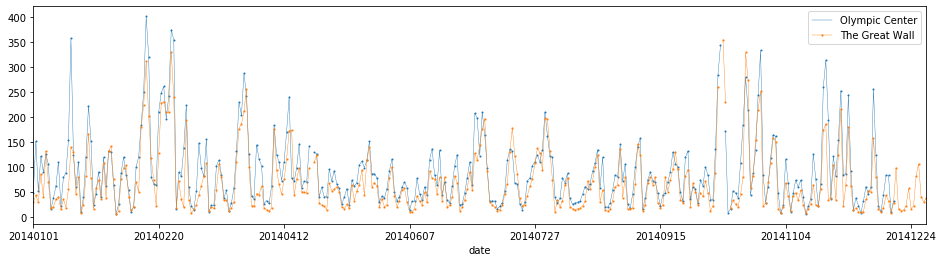

In [101]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(16, 4))

# Line plot
df_subset.plot(kind = "line", x = 'date', y='Olympic Center', marker='o', markersize=1, linewidth=0.4, ax = ax)
df_subset.plot(kind = "line", x = 'date', y='The Great Wall', marker='s', markersize=1, linewidth=0.4, ax = ax)

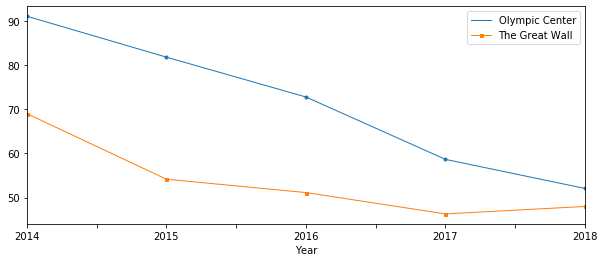

In [102]:
# (6)
df_subset = df_combine[["Olympic Center","The Great Wall", "Year"]]
df_subset = df_subset.groupby("Year").mean()

fig, ax = plt.subplots(figsize=(10, 4))

df_subset.plot(kind = "line", y='Olympic Center', marker='o', markersize=3, linewidth=1, ax = ax)
df_subset.plot(kind = "line", y='The Great Wall', marker='s', markersize=3, linewidth=1, ax = ax)

In [104]:
# (7)
df_combineT = df_combine.set_index('date').T
df_coord = pd.read_excel("PM25_dataset/lnglat.xlsx")  

df_final = pd.merge(df_combineT, df_coord,left_index=True, right_on="Eng_name")
df_final

,20140101,20140102,20140103,20140104,20140105,20140106,20140107,20140108,20140109,20140110,...,20181225,20181226,20181227,20181228,20181229,20181230,20181231,Eng_name,lon,lat
0,56.2083,129.375,50.5833,130.458,90.8333,133.792,103,17.5,25.4348,67.625,...,34.8261,18.7917,8.83333,8.54167,8.33333,12.625,39.125,Dongsi,116.41700,39.92900
1,48.75,108.625,44.8333,125.542,78.4583,133.75,91.5417,13.4583,24.4348,67.7917,...,35.1304,3.18182,7.11111,6.79167,8.52174,11.9167,38.2083,Tiantan,116.40700,39.88600
2,48.7917,113.458,43.6667,115.583,74.2917,121.5,95.125,13.7917,30.3478,69.0833,...,27.7727,8.125,9.75,8.17391,7.95833,12.625,41.0417,Guanyuan,116.33900,39.92900
3,71.25,123.875,57.1667,132.042,80.25,136.708,94,21.5833,42.5652,111.375,...,32.5833,12.4545,11,9.83333,9.95833,14.125,42.875,Wanshouxigong,116.35200,39.87800
4,48.4583,151.708,50.875,121.5,90.125,125.208,105.042,15.2083,36.7391,60.7083,...,31.1667,7.5,7.5,9.33333,9.08333,14.125,38.7083,Olympic Center,116.39700,39.98200
5,50.6667,142.25,53.875,136.833,98,136.292,108.417,13.6667,27.6957,72.0833,...,40.5417,9.625,9.79167,9.58333,10.5417,14.7083,41.375,Nongzhanguan,116.46100,39.93700
6,69.1667,152.042,55.2083,127.042,98.0833,136.375,111.25,15.0417,29.0435,84.2083,...,20.5,8.70833,5.30435,7.55,8.70833,15.9167,32.125,Wanliu,116.28700,39.98700
7,34.2083,110.625,51.0833,124.458,123.708,158.25,104.708,15.6667,23.2609,91.625,...,23.3333,10.5833,5.27273,5.17391,8.04348,19.1739,33.4545,North New District,116.17400,40.09000
8,20.7826,83.8636,31.375,112.083,61.6522,128.333,81.8696,12.7083,21.4348,62.4583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botanical Garden,116.20700,40.00200
9,88.8333,135.792,64.0833,142.833,89.7083,150.333,106.625,16.7917,38.1304,101.125,...,33.0417,11.6667,8.5,6.375,8.95833,16.875,37,Fengtai Garden,116.27900,39.86300
